<a href="https://colab.research.google.com/github/naveenchintalapudi/WebTechnologies/blob/main/Human_LLM_generated_phishing_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
legit_df = pd.read_csv('/content/drive/MyDrive/Human-LLM generated phishing-legitimate emails/legit.csv/legit.csv')
phishing_df = pd.read_csv('/content/drive/MyDrive/Human-LLM generated phishing-legitimate emails/phishing.csv/phishing.csv')

In [ ]:
# Print the first few rows and columns of each dataframe to check column names
print(legit_df.head())
print(phishing_df.head())

                                              sender  \
0  Jesus Miguel Recuenco Ezquerra <JMRECU@telelin...   
1                    Trade Me <xfnbqb@trademe.co.nz>   
2                    Trade Me <xfnbqb@trademe.co.nz>   
3          Kevin Jacobson <wffjeanja@northtec.ac.nz>   
4        Albert van Aardt <zfdrqfguo@northtec.ac.nz>   

                                 receiver                 date  \
0  handy board <handyboard@media.mit.edu>  2019-10-29 22:53:50   
1           user2.4@gvc.ceas-challenge.cc  2008-08-06 13:53:26   
2           user2.4@gvc.ceas-challenge.cc  2008-08-06 13:45:53   
3           user2.1@gvc.ceas-challenge.cc  2008-08-06 13:43:27   
4           user2.1@gvc.ceas-challenge.cc  2008-08-06 13:26:57   

                                             subject  \
0                            Starting IC with wizard   
1  Trade Me -- A question on your auction: Auctio...   
2  Trade Me - A request from a Trade Me member. A...   
3                      RE: NorthTec Accoun

In [ ]:

# Add labels to datasets
legit_df['label'] = 'legit'
phishing_df['label'] = 'phishing'

In [ ]:
df = pd.concat([legit_df, phishing_df], ignore_index=True)

In [ ]:
print(df.columns)

Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')


In [ ]:
df.dropna(subset=['body'], inplace=True)

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['body'])
y = df['label']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.935
Classification Report:
              precision    recall  f1-score   support

       legit       0.98      0.89      0.93       199
    phishing       0.90      0.98      0.94       201

    accuracy                           0.94       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.94      0.94      0.93       400



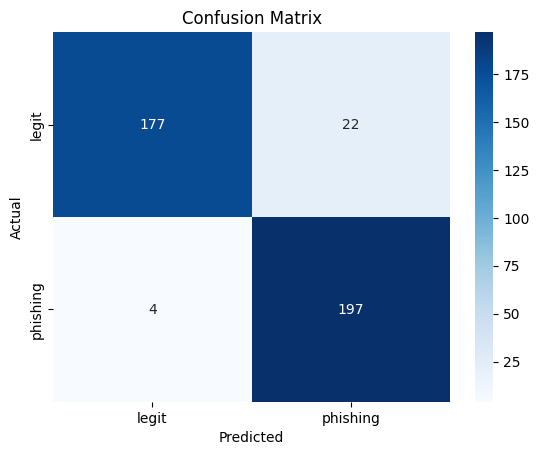

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['legit', 'phishing'], yticklabels=['legit', 'phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

       legit       0.99      0.93      0.96       199
    phishing       0.93      1.00      0.96       201

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



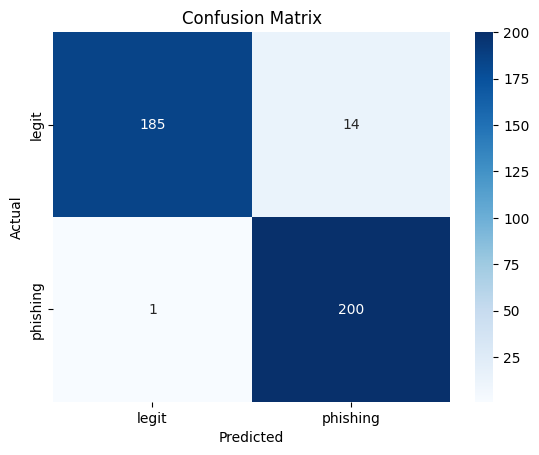

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['legit', 'phishing'], yticklabels=['legit', 'phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Train the neural network classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9975
Classification Report:
              precision    recall  f1-score   support

       legit       0.99      1.00      1.00       199
    phishing       1.00      1.00      1.00       201

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



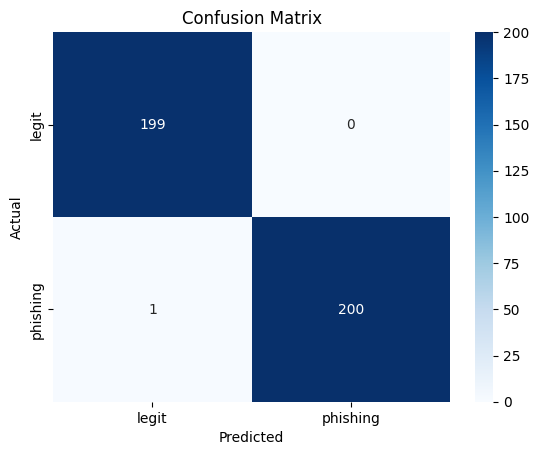

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['legit', 'phishing'], yticklabels=['legit', 'phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

       legit       0.98      0.99      0.99       199
    phishing       0.99      0.99      0.99       201

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



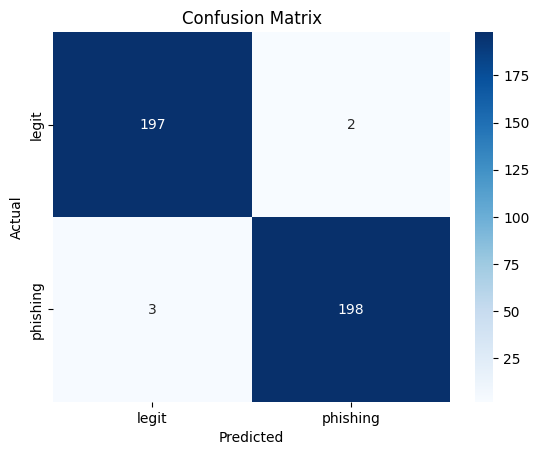

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['legit', 'phishing'], yticklabels=['legit', 'phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()